# Sales & Business Development Job Market — Visualizations (Perth)

This notebook visualizes key insights from the cleaned SEEK dataset,
focusing on Sales and Business Development roles in Perth.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "../data/cleaned/seek_cleaned_perth_jobs_v2.xlsx"
df = pd.read_excel(DATA_PATH)

keywords = ["sales", "business development", "account", "bd", "territory", "commercial"]
mask = df["job_title"].str.lower().str.contains("|".join(keywords), na=False)
sales_df = df[mask].copy()

sales_df.shape


(563, 8)

In [15]:
sales_df["posted_days"].head(20)


0     NaN
1     NaN
2       6
3       8
4      13
5      20
6      11
7      14
8      12
9      14
10     16
11     13
12     11
13      6
14      7
15     13
16     13
17     27
18     19
19     18
Name: posted_days, dtype: object

In [16]:
import numpy as np
import re

def posted_to_days(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()

    # 已經是數字
    if re.fullmatch(r"\d+(\.\d+)?", s):
        return float(s)

    # 分鐘 / 小時 → 視為今天
    if re.search(r"\d+\s*m", s):
        return 0
    if re.search(r"\d+\s*h", s):
        return 0

    # 天
    d = re.search(r"(\d+)\s*d", s)
    if d:
        return int(d.group(1))

    # '1 day ago', '2 days ago'
    day = re.search(r"(\d+)\s*day", s)
    if day:
        return int(day.group(1))

    # 週
    week = re.search(r"(\d+)\s*week", s)
    if week:
        return int(week.group(1)) * 7

    return np.nan

sales_df["posted_days_num"] = sales_df["posted_days"].apply(posted_to_days)

sales_df[["posted_days", "posted_days_num"]].head(10)


,posted_days,posted_days_num
0,NaN,NaN
1,NaN,NaN
2,6,6.0
3,8,8.0
4,13,13.0
5,20,20.0
6,11,11.0
7,14,14.0
8,12,12.0
9,14,14.0


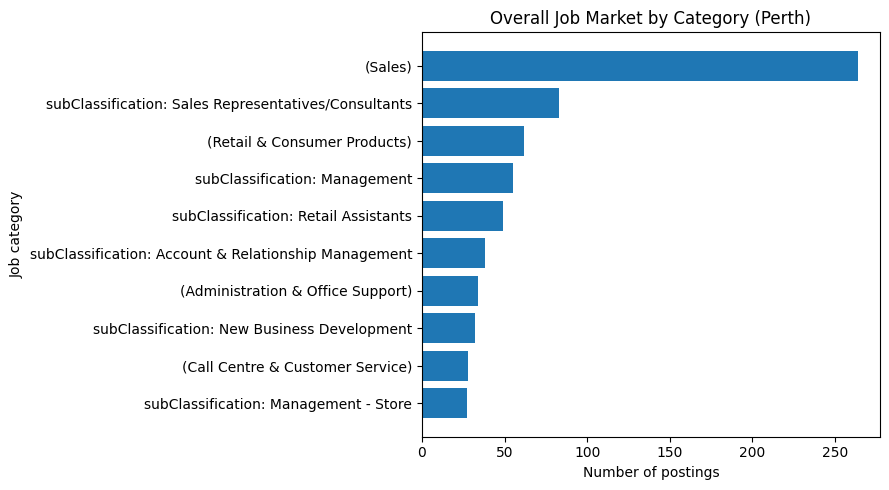

In [17]:
# Overall job market by category
top_categories = df["category"].value_counts().head(10)[::-1]

plt.figure(figsize=(9,5))
plt.barh(top_categories.index, top_categories.values)
plt.title("Overall Job Market by Category (Perth)")
plt.xlabel("Number of postings")
plt.ylabel("Job category")
plt.tight_layout()
plt.show()


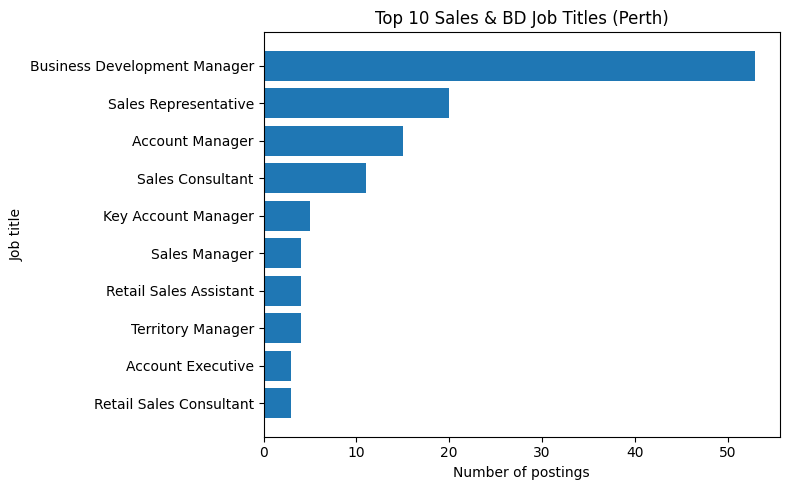

In [18]:
top_titles = sales_df["job_title"].value_counts().head(10)[::-1]

plt.figure(figsize=(8,5))
plt.barh(top_titles.index, top_titles.values)
plt.title("Top 10 Sales & BD Job Titles (Perth)")
plt.xlabel("Number of postings")
plt.ylabel("Job title")
plt.tight_layout()
plt.show()


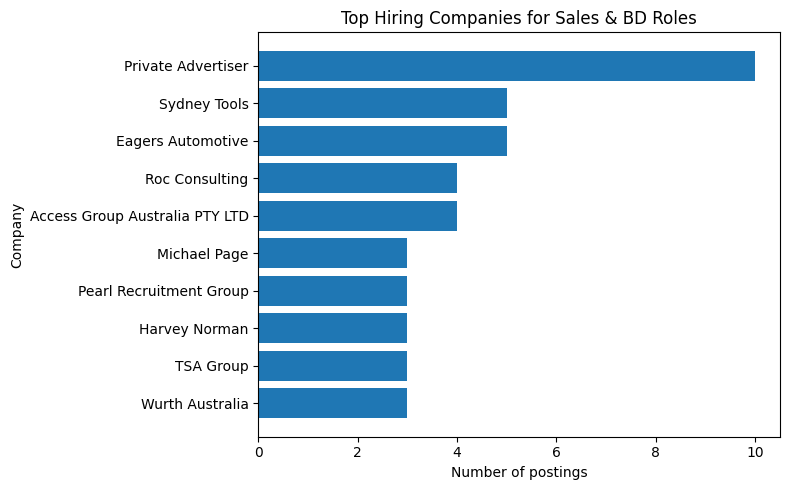

In [19]:
top_companies = sales_df["company"].value_counts().head(10)[::-1]

plt.figure(figsize=(8,5))
plt.barh(top_companies.index, top_companies.values)
plt.title("Top Hiring Companies for Sales & BD Roles")
plt.xlabel("Number of postings")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


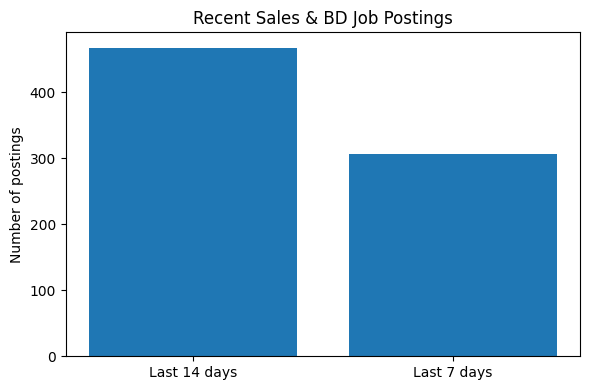

In [20]:
recent_14d = sales_df[sales_df["posted_days_num"] <= 14]
recent_7d = sales_df[sales_df["posted_days_num"] <= 7]


plt.figure(figsize=(6,4))
plt.bar(["Last 14 days", "Last 7 days"], [len(recent_14d), len(recent_7d)])
plt.title("Recent Sales & BD Job Postings")
plt.ylabel("Number of postings")
plt.tight_layout()
plt.show()


In [21]:
sales_df["posted_days_num"].isna().mean()


np.float64(0.03197158081705151)